In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [494]:
X = np.random.rand(100, 1) * 6-3 
y = 0.5* X**2 + 1.5 * X + 2+ np.random.randn(100, 1) 

In [495]:
X

array([[ 0.71166827],
       [ 1.51629984],
       [-2.04836937],
       [ 2.28522456],
       [ 2.23106117],
       [-2.8245163 ],
       [ 1.9549005 ],
       [-2.2267808 ],
       [-0.98928687],
       [ 1.46104954],
       [-2.03544062],
       [ 1.90780214],
       [ 1.99280507],
       [ 0.0448064 ],
       [-2.96168477],
       [-1.2777712 ],
       [ 0.70156151],
       [ 2.88711707],
       [ 0.79088116],
       [-1.44117851],
       [ 0.80403422],
       [ 0.23991228],
       [ 1.67907237],
       [-2.35811617],
       [ 1.56616742],
       [ 0.24759947],
       [ 2.77795202],
       [-0.948767  ],
       [ 0.79573136],
       [ 2.59216863],
       [-2.38494163],
       [ 2.62337092],
       [ 1.12731433],
       [-2.59297765],
       [-1.1942186 ],
       [ 1.24903253],
       [-2.59589639],
       [ 0.49302276],
       [-0.92470166],
       [ 0.72549311],
       [-2.7255478 ],
       [ 2.22922084],
       [ 2.84093382],
       [ 2.81326713],
       [ 1.49791099],
       [-2

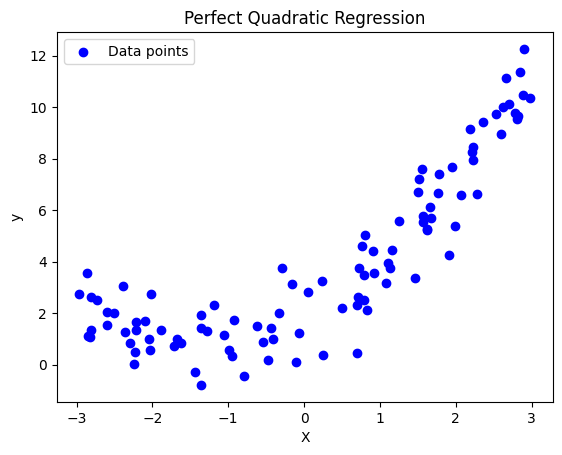

In [496]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Perfect Quadratic Regression')
plt.legend()
plt.show()

In [497]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [498]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()


In [499]:
regression.fit(X_train,y_train)

LinearRegression()

In [500]:
print("Coefficient is :: ",regression.coef_)
print("Intercept  is :: ",regression.intercept_)

Coefficient is ::  [[1.39173676]]
Intercept  is ::  [3.63981431]


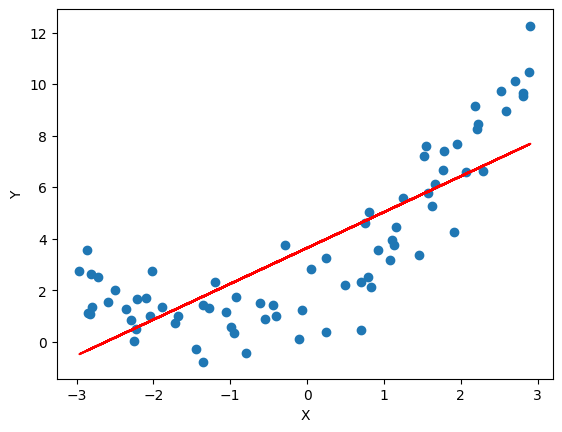

In [501]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [502]:
y_pred=regression.predict(X_test)

In [503]:
## R squared 

from sklearn.metrics import r2_score

score =r2_score(y_test,y_pred)
print(score)


0.7164951250179857


In [504]:
## Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=True)

In [505]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [506]:
X_train_poly

array([[ 1.00000000e+00, -1.27777120e+00,  1.63269924e+00,
        -2.08621607e+00],
       [ 1.00000000e+00, -2.72554780e+00,  7.42861079e+00,
        -2.02470338e+01],
       [ 1.00000000e+00,  1.77922375e+00,  3.16563714e+00,
         5.63237677e+00],
       [ 1.00000000e+00,  1.46104954e+00,  2.13466575e+00,
         3.11885241e+00],
       [ 1.00000000e+00, -6.14433612e-01,  3.77528664e-01,
        -2.31966301e-01],
       [ 1.00000000e+00,  1.90780214e+00,  3.63970902e+00,
         6.94384468e+00],
       [ 1.00000000e+00, -2.85247850e+00,  8.13663360e+00,
        -2.32095724e+01],
       [ 1.00000000e+00, -1.88684691e+00,  3.56019125e+00,
        -6.71753584e+00],
       [ 1.00000000e+00,  7.95731359e-01,  6.33188395e-01,
         5.03847862e-01],
       [ 1.00000000e+00, -2.80484292e+00,  7.86714382e+00,
        -2.20661027e+01],
       [ 1.00000000e+00, -2.82451630e+00,  7.97789234e+00,
        -2.25336870e+01],
       [ 1.00000000e+00,  2.70518137e+00,  7.31800626e+00,
      

In [507]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly) 



score =r2_score(y_test,y_pred)
print(score)


0.936823531840315


In [508]:
print(regression.coef_)
print(regression.intercept_)

[[ 0.00000000e+00  1.50032372e+00  5.73720458e-01 -1.27115004e-03]]
[1.74226011]


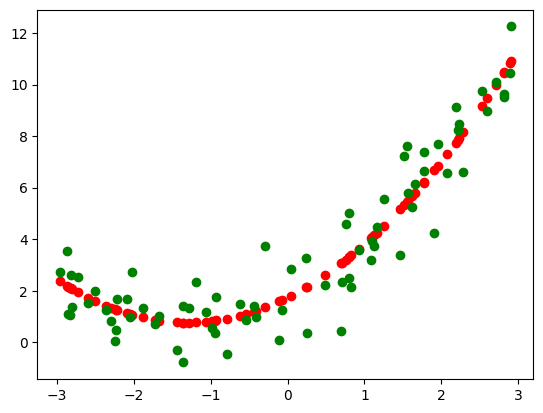

In [509]:
plt.scatter(X_train,regression.predict(X_train_poly),color='red')
plt.scatter(X_train,y_train,color='green')

In [518]:
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)


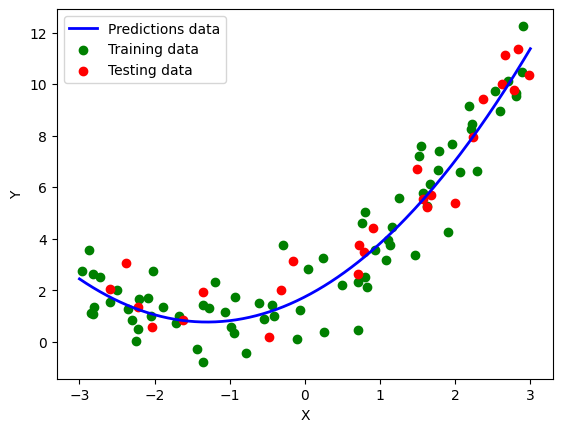

In [523]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,color='blue',linewidth=2,label='Predictions data')
plt.scatter(X_train,y_train,color='green',label='Training data')
plt.scatter(X_test,y_test,color='red',label='Testing data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()